# Credit Card Data Exploration


In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

import matplotlib.pyplot as plt

# render plotting automatically
%matplotlib inline

# high resolution figures
mpl.rcParams['figure.dpi'] = 400

from scipy import stats

In [2]:
print('Python version:', sys.version)
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', mpl.__version__)
print('Sklearn version:', sklearn.__version__)

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.4
Sklearn version: 1.4.2


# Loading Case Study Data

In [3]:
df = pd.read_excel('ClientCreditCard.xlsx')

c:\Users\saran\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
df.shape

(30000, 25)

# Verify Basic Data Integrity

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df['ID'].nunique()

29687

- Less unique than number of rows (30,000) so there are duplicates.

In [8]:
id_count = df['ID'].value_counts()
id_count.head()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

In [9]:
id_count.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

- There are 313 ID's that appear twice. 29374 + 2 * 313 = 30000.

# Boolean Masks

In [10]:
np.random.seed(seed=24)
random_integers = np.random.randint(low=1, high=5, size=100)

In [11]:
random_integers[:5]

array([3, 4, 1, 4, 2])

In [12]:
is_equal_to_3 = random_integers == 3

In [13]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [14]:
sum(is_equal_to_3)

22

In [15]:
random_integers[is_equal_to_3]
# random_integers[random_integers == 3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# Continuing Verification of Data Integrity

In [16]:
duplicates_mask = id_count == 2

In [17]:
duplicates_mask[:5]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [18]:
id_count.index[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object', name='ID')

In [19]:
duplicate_ids = id_count.index[duplicates_mask]
# duplicate_ids = id_count.index[id_count == 2] 
duplicate_ids

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       '4f249cbc-5e9c', '40e75290-0f59', 'fc73f07e-eb96', '2a8ad33f-fa9c',
       'cdae2be5-8ec4', 'c69162db-4864', '73ea498f-44b2', '327d06d5-ce7f',
       'd13465a5-a9e0', '841ae407-dc4c'],
      dtype='object', name='ID', length=313)

In [20]:
duplicate_ids = list(duplicate_ids)
len(duplicate_ids)

313

In [21]:
duplicate_ids[:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [22]:
# Getting the entire row of a duplicate ID
df.loc[df['ID'].isin(duplicate_ids[0:3]), :].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 2nd duplicate of each ID contains 0 values, missing or corrupted data.

In [23]:
df.shape

(30000, 25)

In [24]:
df_0_mask = df == 0
df_0_mask.shape

(30000, 25)

In [25]:
# iloc[:, 1:] <-- Passing all of the rows ":" and all columns except for the first "1:" column , aka the ID column
# .all(axis=1) <-- Gets rows where all columns except for ID is 0 (iloc[:, 1:] avoids ID column with '1:')

feature_0_mask = df_0_mask.iloc[:, 1:].all(axis=1)

In [26]:
sum(feature_0_mask)

315

In [27]:
# Cleaning our data frame, and removing all rows with 0 in every column except ID column
df_clean_1 = df.loc[~feature_0_mask, :].copy()
df_clean_1.shape

(29685, 25)

In [28]:
df_clean_1['ID'].nunique()

29685

- 29685 == 29685 , so no duplicated in df_clean_1

# Explore the Columns of Data

In [29]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [30]:
df_clean_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [31]:
df_clean_1['PAY_1'].head()

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

- WE SHOULD NOT HAVE 0'S, 0 VALUE NON-EXISTENT IN DATA DICTIONARY (Client Credit Card Data Dictionary.xlsx)

In [32]:
df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [33]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
sum(valid_pay_1_mask)

26664

- We have 26664 valid 'PAY 1' rows.

In [34]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()
df_clean_2['PAY_1'].value_counts()

PAY_1
0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: count, dtype: int64

In [35]:
df_clean_2.shape

(26664, 25)

In [36]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  object
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


- PAY_1 is still 'object' data type, want 'int64'

In [37]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [38]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

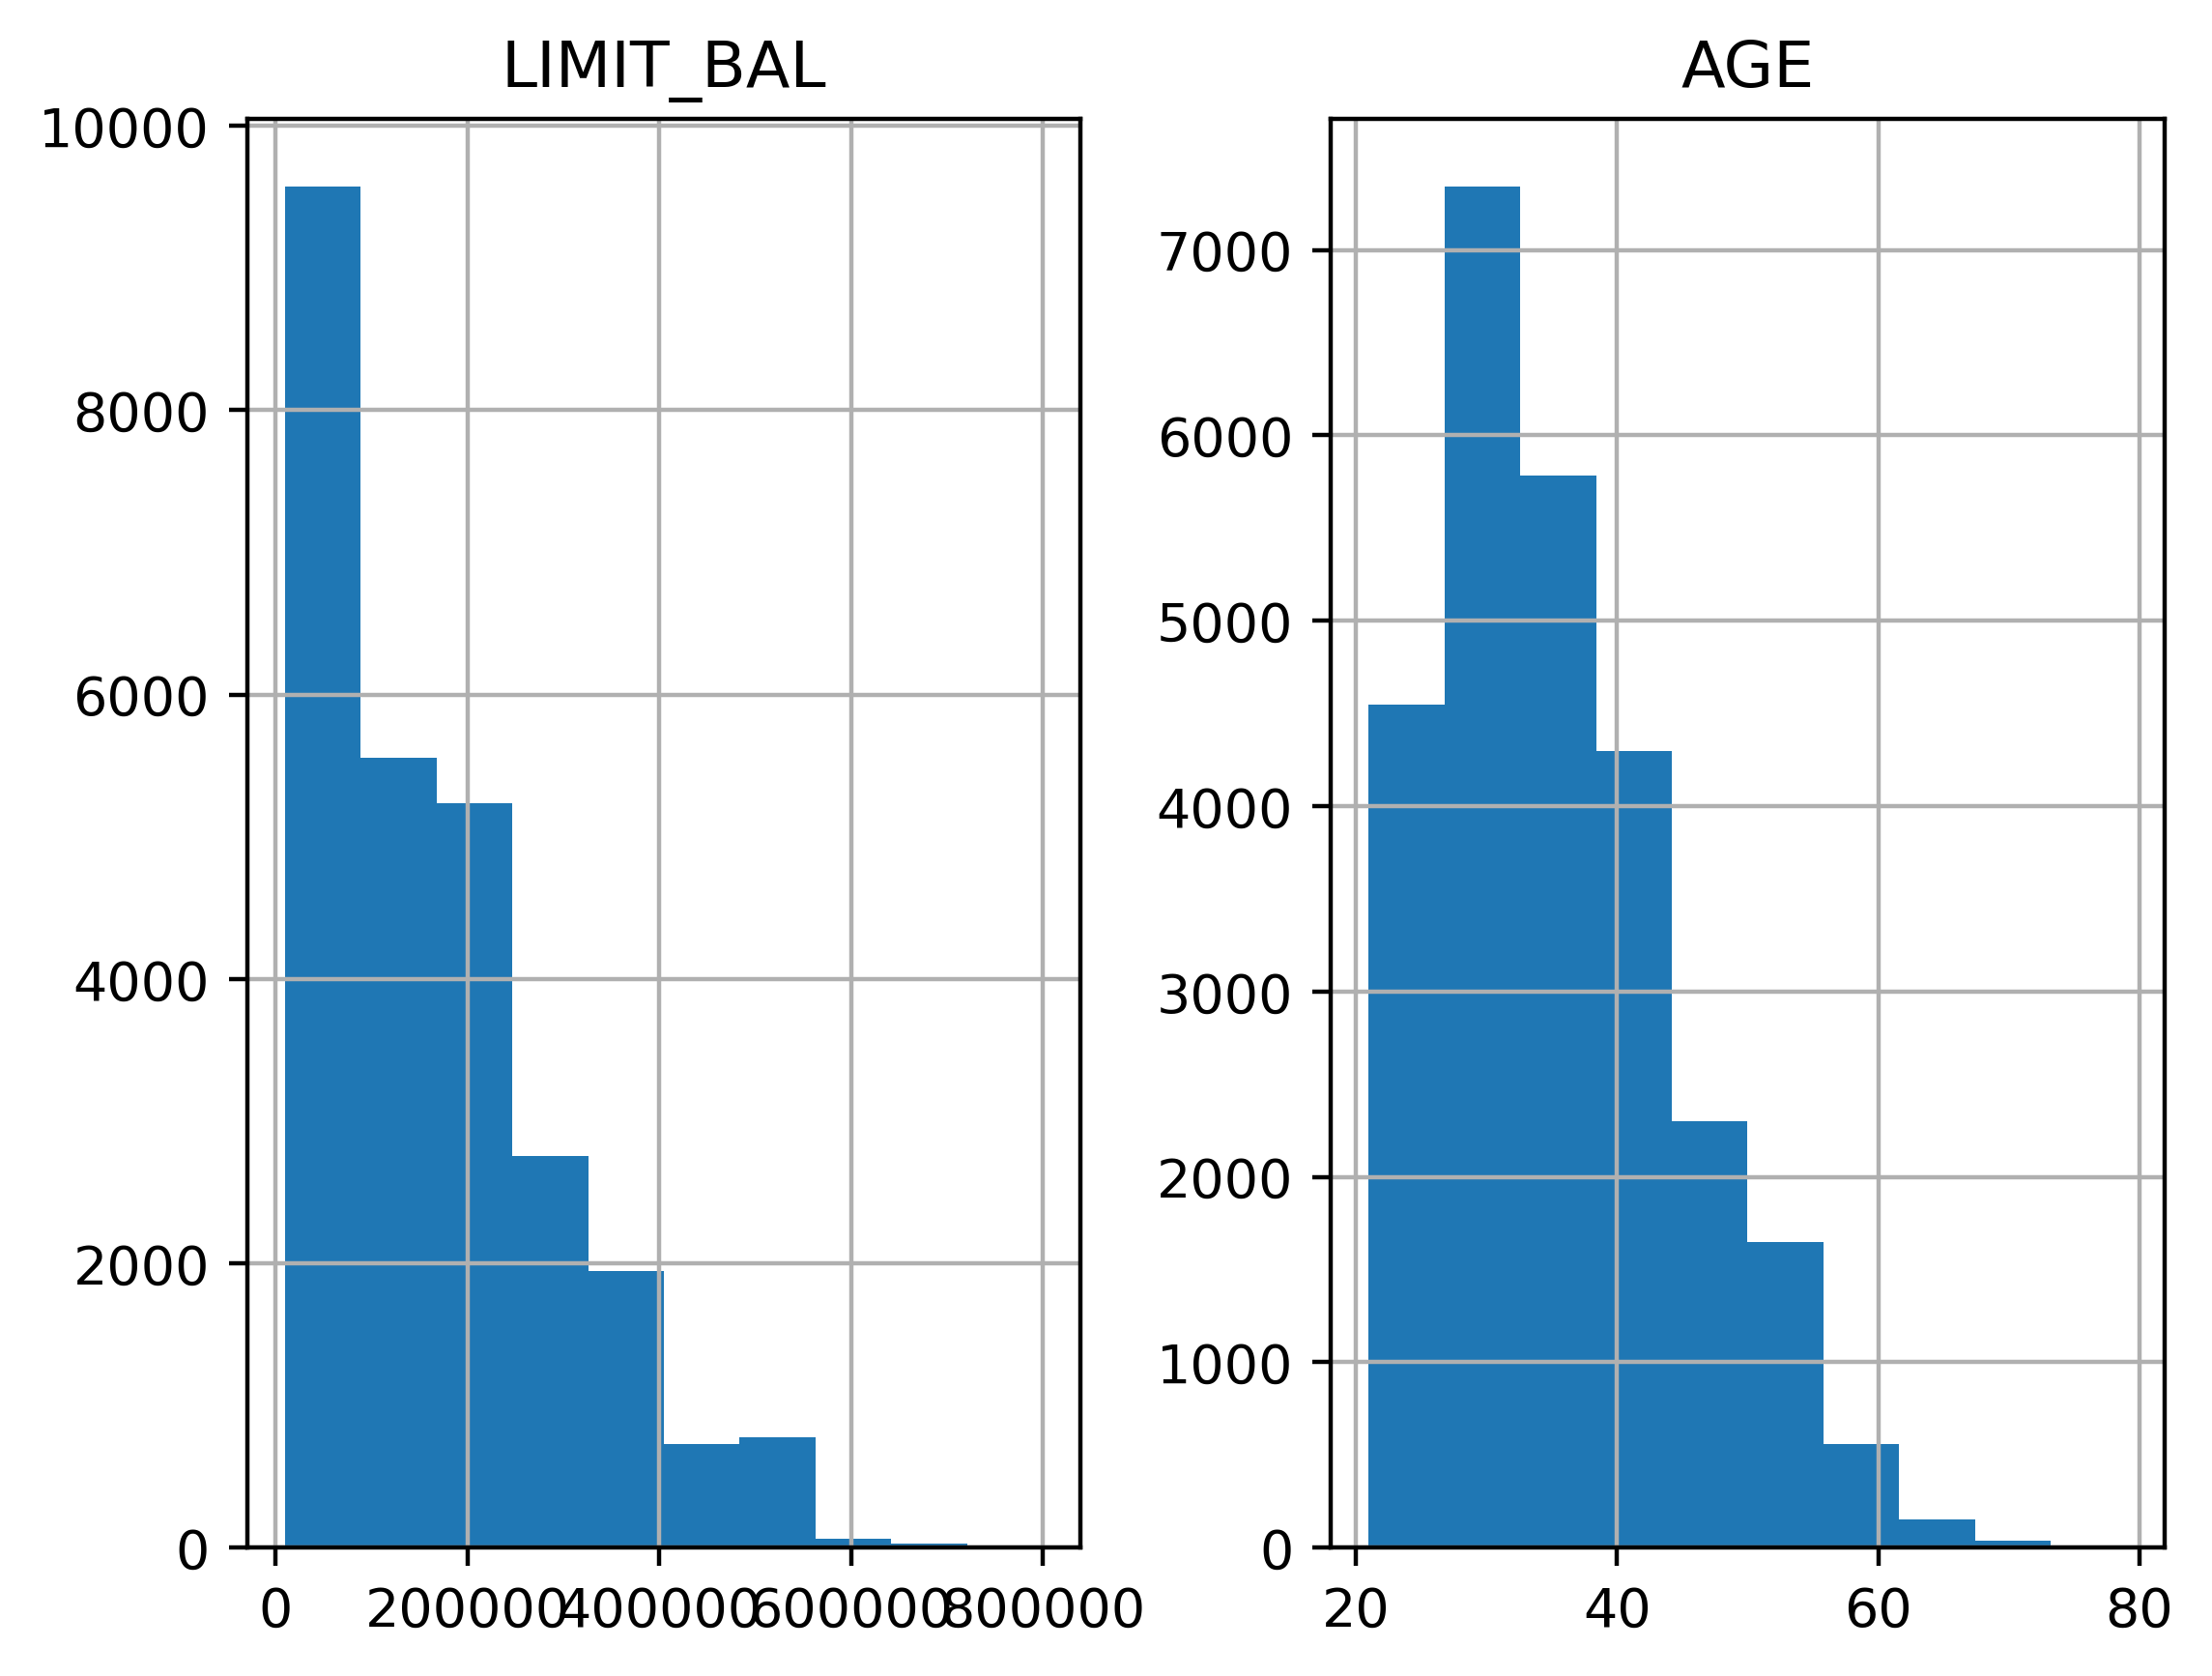

In [39]:
# Using matplotlib, creating a histogram
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [40]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [41]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

- According to Data Dictionary ['EDUCATION'] = 1=graduate school, 2= University, 3= High School. 4=others. 
- No other values allowed (5, 6, 0 not allowed).

- Lets say client says to fix by putting values not in Data Dictionary as 4 (others).

In [42]:
df_clean_2['EDUCATION'].replace(to_replace=[5, 6, 0], value=4, inplace=True)

C:\Users\saran\AppData\Local\Temp\ipykernel_2360\608039181.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace=[5, 6, 0], value=4, inplace=True)


In [43]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [44]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

- According to Data Dictionary ['MARRIAGE'] = 1=married, 2=single, or 3=others.
- No other values allowed (0 not allowed).

In [45]:
df_clean_2['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)

C:\Users\saran\AppData\Local\Temp\ipykernel_2360\325701147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)


In [46]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

# Categorical Features

In [47]:
# Synthetic near-linear data
X = np.array(range(1,11))
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [48]:
np.random.seed(seed=24)

Y = 2 * X + np.random.normal(0, 1, 10)
Y

array([ 3.32921217,  3.22996655,  5.68371964,  7.00918961,  8.92918374,
       10.56128672, 14.56441685, 16.29572189, 16.37359577, 20.2195652 ])

In [49]:
slope_line, intercept_line, r_value, p_value, std_err = stats.linregress(X, Y)

([<matplotlib.axis.YTick at 0x20c1ae46390>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20')])

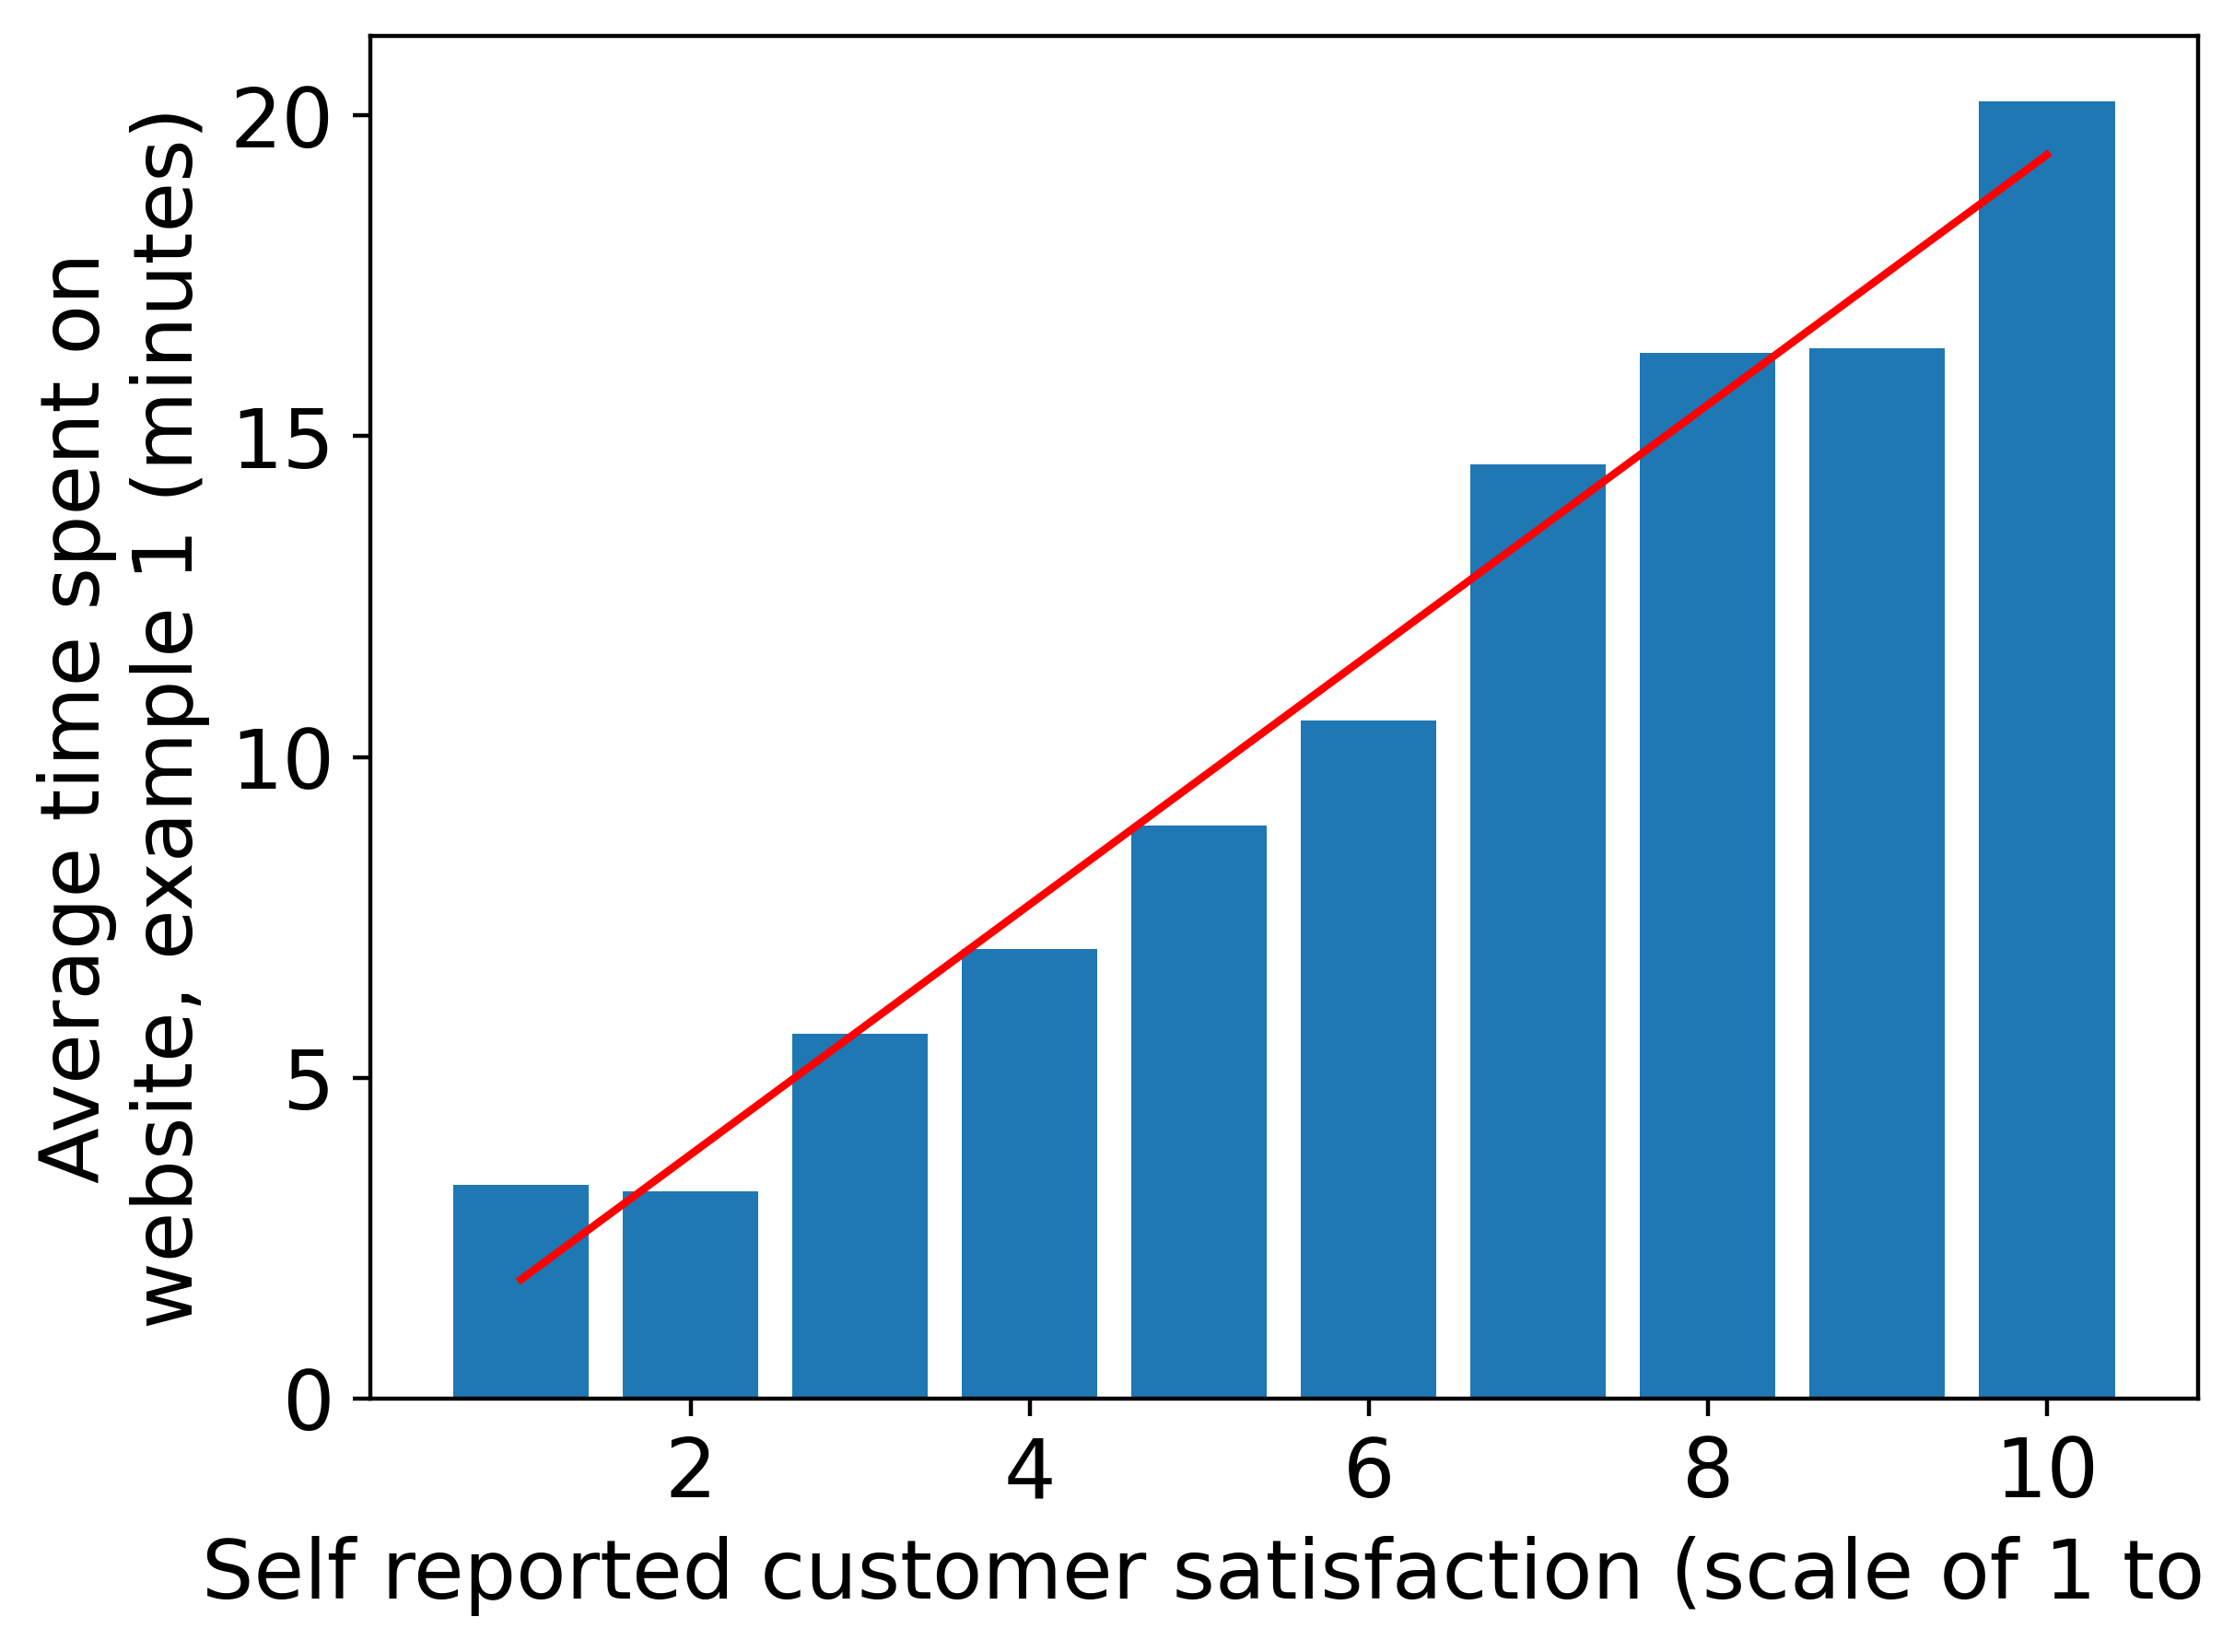

In [50]:
# Formatting the linear regression plot
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 16

# Plotting the data
plt.plot(X, slope_line * X + intercept_line, 'r-') # Y = M(slope) * X + B(intercept)
plt.bar(X, Y, align='center')

# Labeling the graph
plt.xlabel('Self reported customer satisfaction (scale of 1 to 10)')
plt.ylabel('Average time spent on\nwebsite, example 1 (minutes)')
plt.yticks(range(0, 25, 5))

- Near linear relationship between Ordinal variables (order matters variables) and Dependent variable.

In [51]:
# Making a new set of data for example
np.random.seed(seed=20)
noise = np.random.normal(0, 1, 10)
Y_poly = (-1) * (X-2) * (X-9) + (10) + (noise)

In [52]:
# Setting variables so we can plot
slope_poly, intercept_poly, r_value, p_value, std_err = stats.linregress(X, Y_poly)

Text(0, 0.5, 'Average time spent on\nwebsite, example 2 (minutes)')

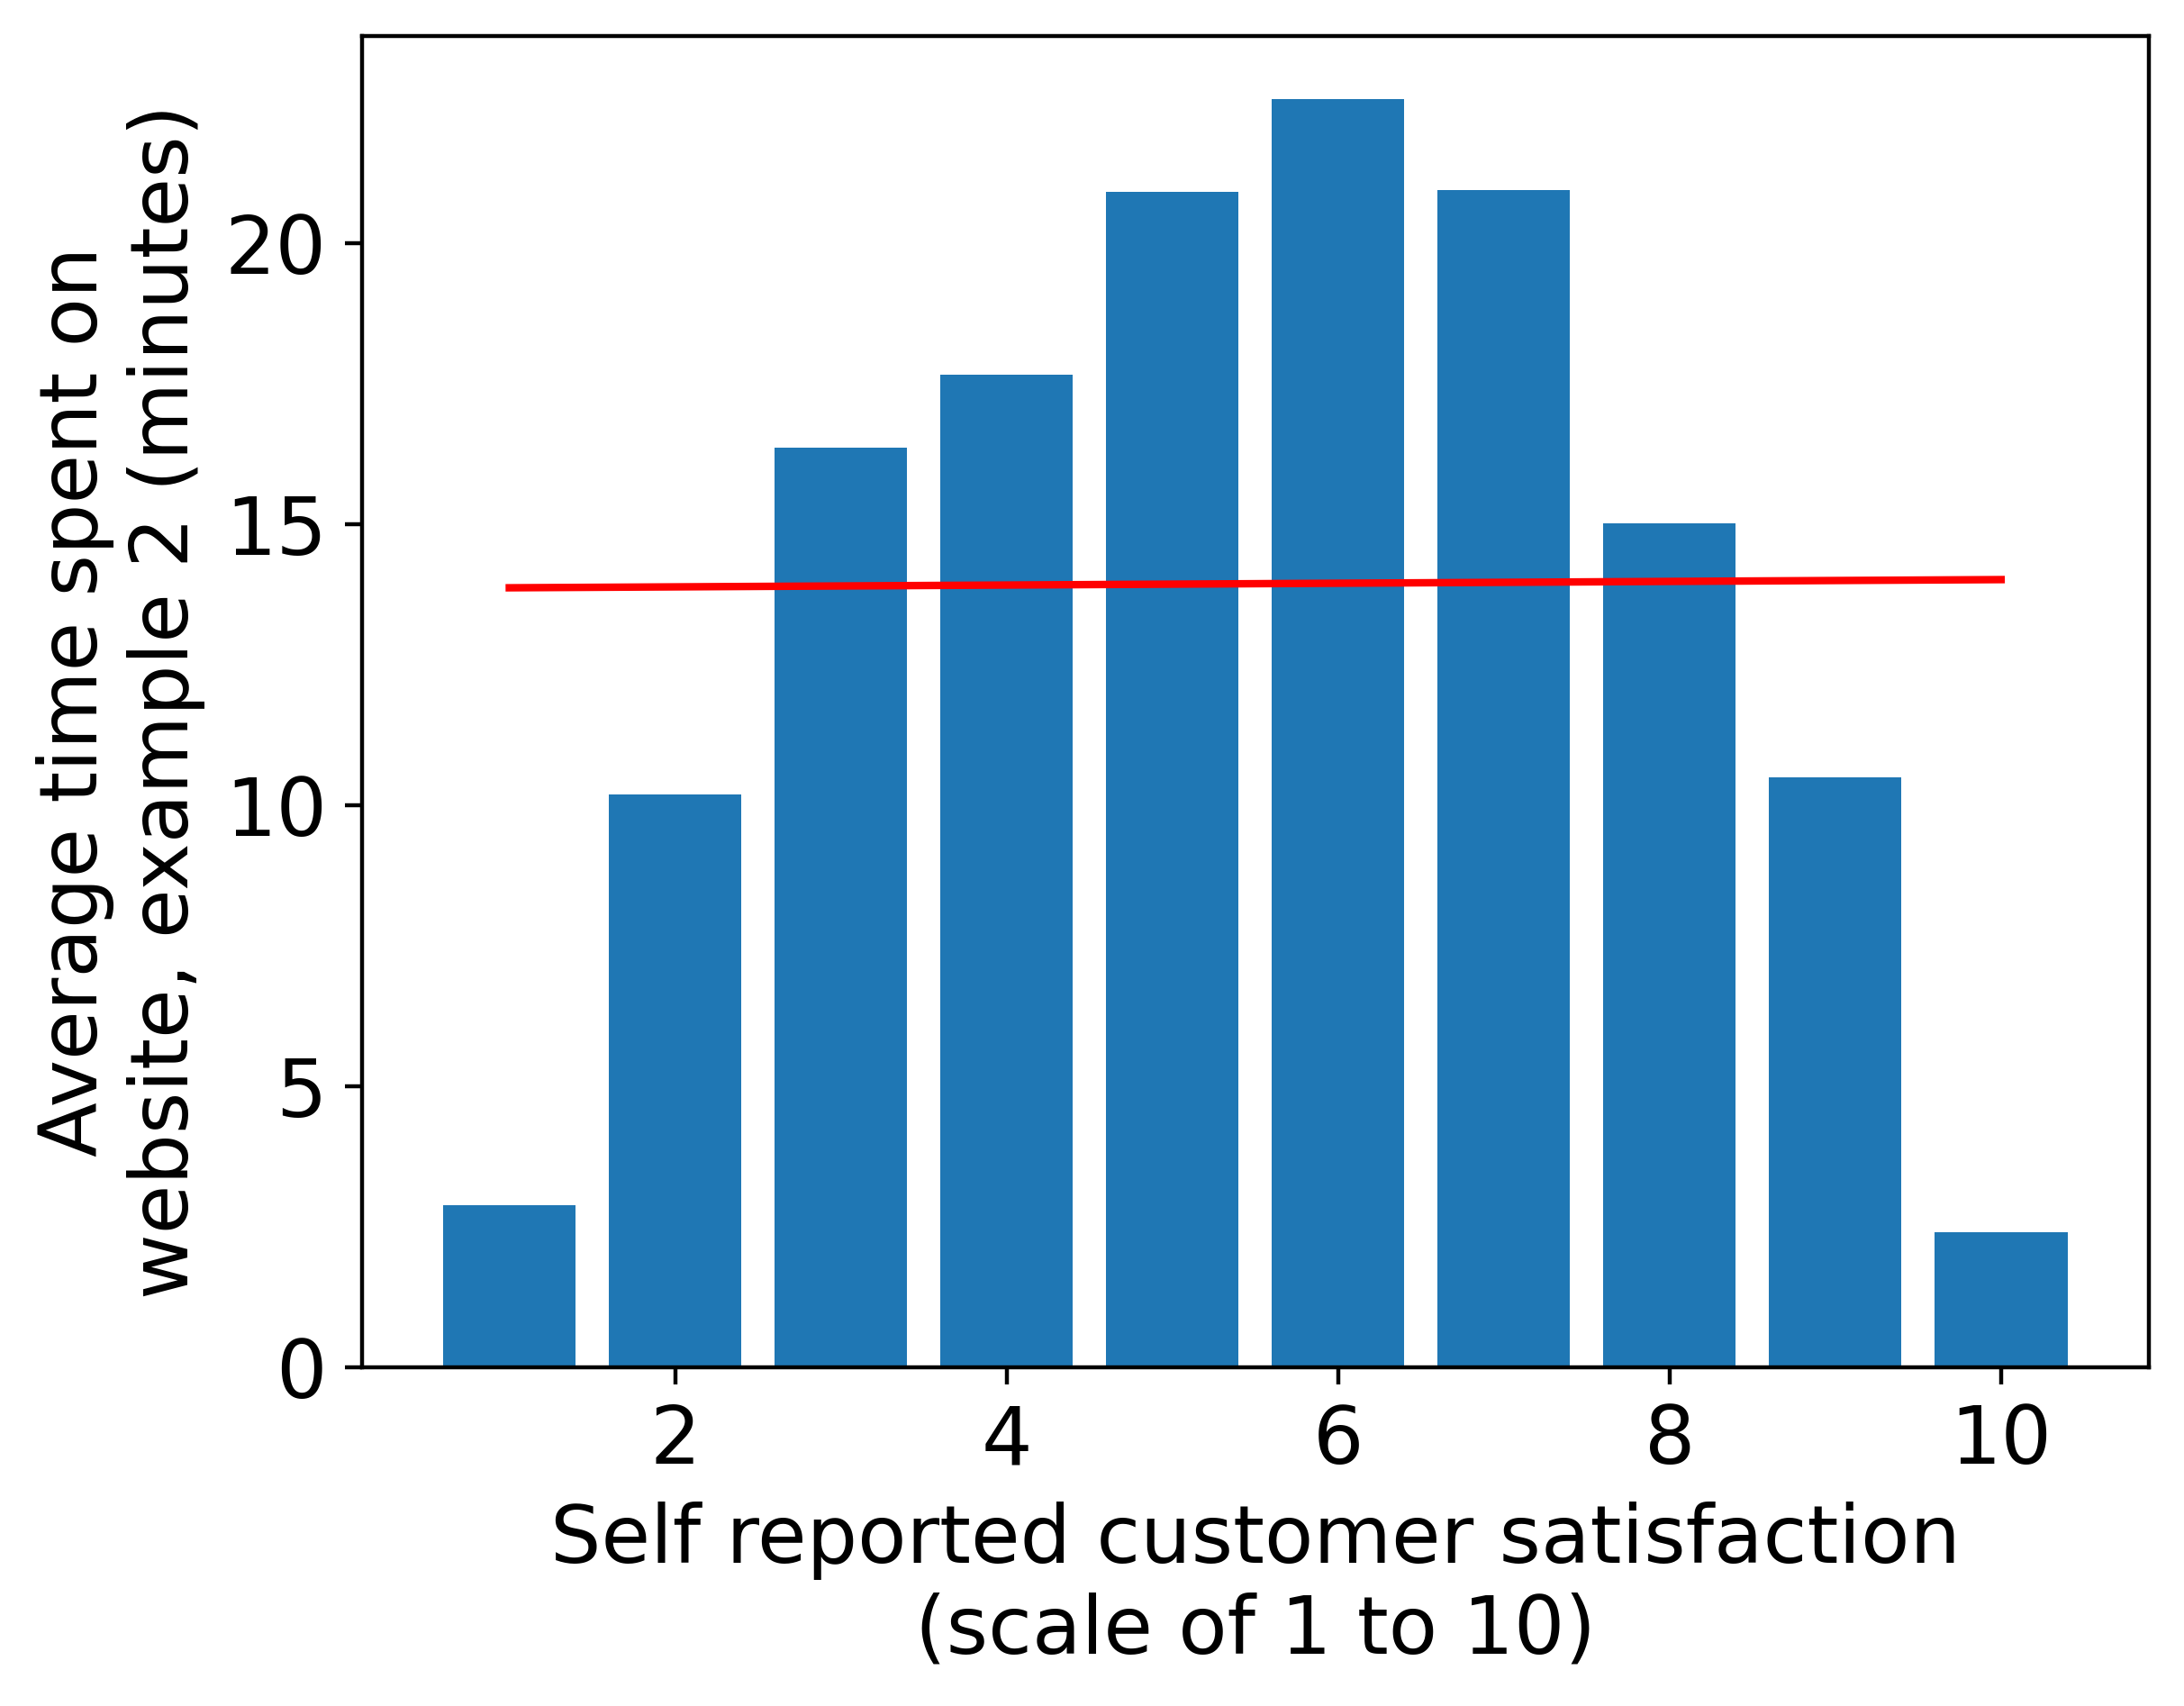

In [53]:
# Plotting the data
plt.plot(X, slope_poly * X + intercept_poly, 'r-') # Y = M(slope) * X + B(intercept)
plt.bar(X, Y_poly, align='center')

# Labeling the graph
plt.xlabel('Self reported customer satisfaction\n(scale of 1 to 10)')
plt.ylabel('Average time spent on\nwebsite, example 2 (minutes)')

- Here we have a categorical variable with more of a normal distribution.
- Should not be categorized as Ordinal variable, there seems to be no relationship between the level of the variable and the level of the Dependant variable.

## Does EDUCATION have any real Ordinal relationship with the predicted default rate (default next month)?

In [54]:
# Checking EDUCATION for Ordinal coding
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'})

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Text(0, 0.5, 'Default Rate')

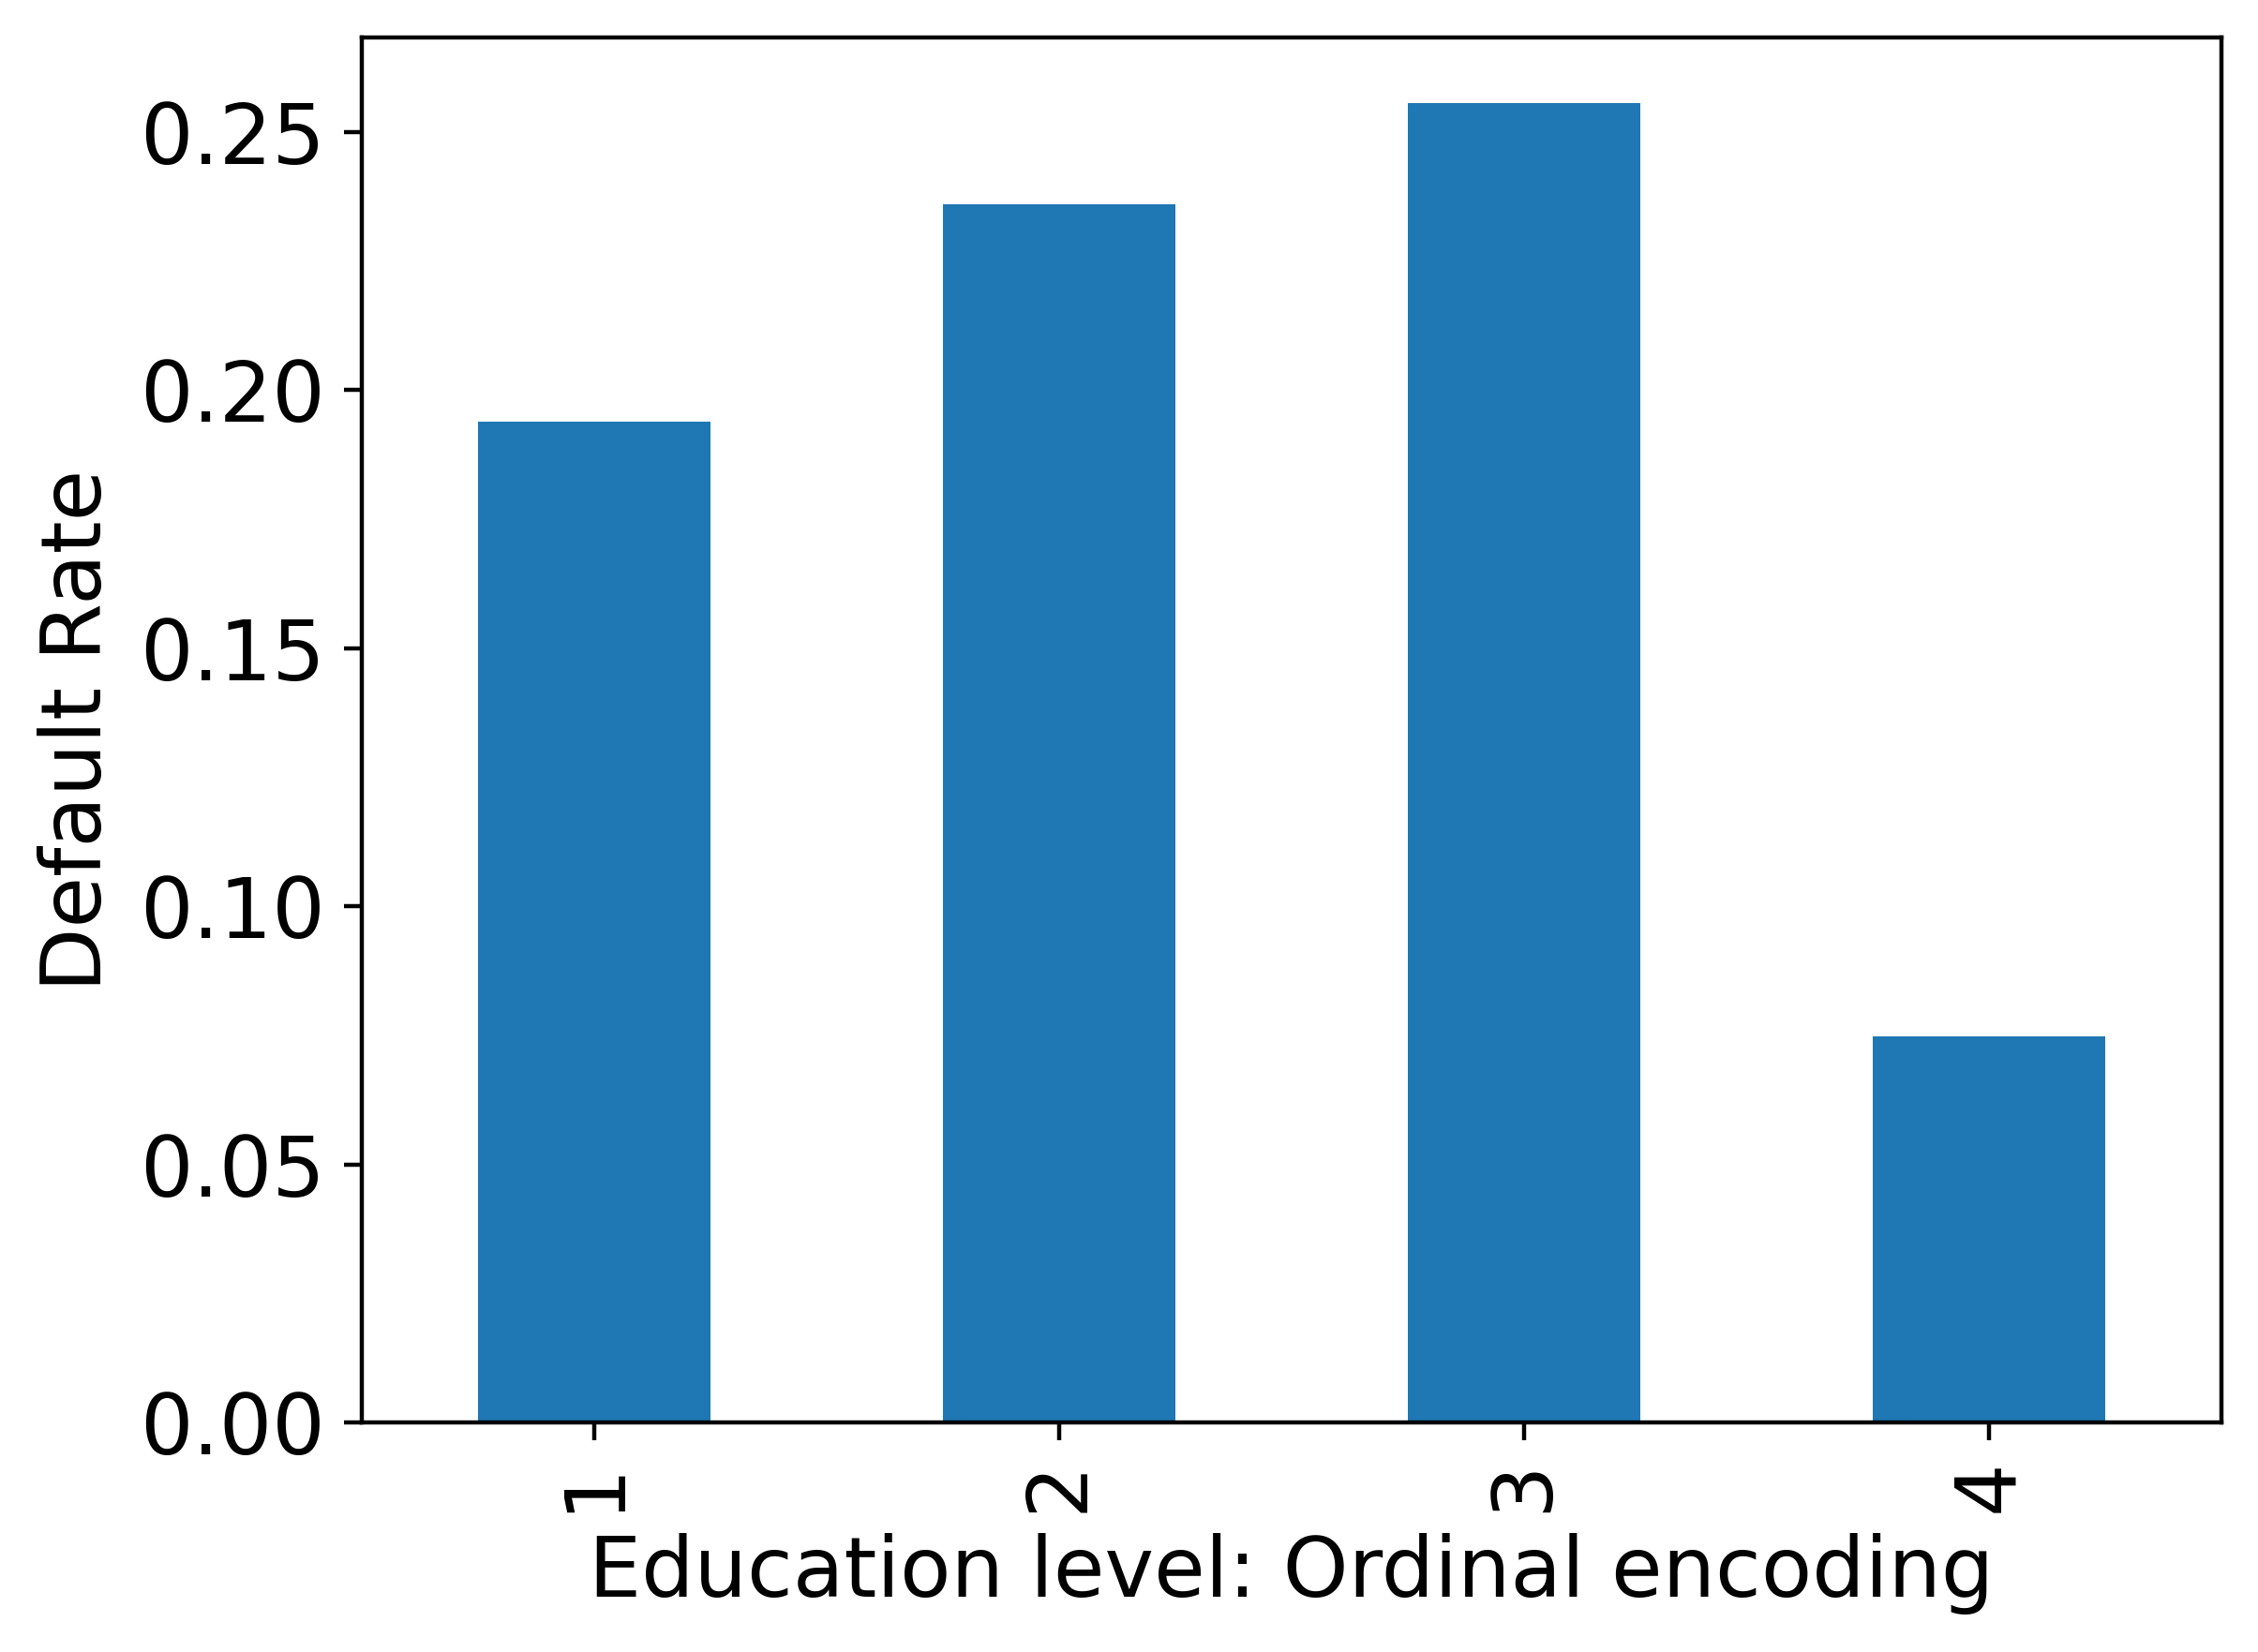

In [55]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.xlabel('Education level: Ordinal encoding')
plt.ylabel('Default Rate')

- Do not need to treat Categorical variables as Ordinal variables if we do not need to.
    - Do not treat Categorical as Ordinal unless there is a clearly predefined external to our coding scheme order to the categories.
- Can do one-hot encoding, make other = 0, 1 = high school, 2 = university, 3 = grad school.
- But one-hot will still not give Ordinal relationship between EDUCATION and 'default payment next month'.

# Implementing One-Hot Encoding for a Categorical feature

In [56]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

- We want to add a column with actual string value for ['EDUCATION'], i.e. [grad school, university, high school, other].

- Data Dictionary ['EDUCATION] : 1 = grad school, 2 = university, 3 = high school, 4 = other.

In [57]:
# Adding empty column to be filled 
df_clean_2['EDU_CATEGORICAL'] = 'none'

# Categorical Mapping
edu_mapping = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'other'
}

# Filling ['EDU_CATEGORICAL'] column with categorical mapping
df_clean_2['EDU_CATEGORICAL'] = df_clean_2['EDUCATION'].map(edu_mapping)

In [58]:
df_clean_2[['EDUCATION', 'EDU_CATEGORICAL']].head(10)

,EDUCATION,EDU_CATEGORICAL
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [59]:
# Creating one-hot encoding dataframe
edu_one_hot = pd.get_dummies(df_clean_2['EDU_CATEGORICAL'], dtype='int')
edu_one_hot.head(10)

,graduate school,high school,other,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [60]:
df_with_one_hot = pd.concat([df_clean_2, edu_one_hot], axis=1)

df_with_one_hot[['EDU_CATEGORICAL', 'graduate school', 'university', 'high school', 'other']].head(10)

,EDU_CATEGORICAL,graduate school,university,high school,other
0,university,0,1,0,0
1,university,0,1,0,0
2,university,0,1,0,0
3,university,0,1,0,0
4,university,0,1,0,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,1,0,0
8,high school,0,0,1,0
9,high school,0,0,1,0


In [61]:
df_with_one_hot.shape

(26664, 30)

- (26664, 25) is now (26664, 30) since we added 5 columns ['EDU_CAT', 'graduate school', 'university', 'high school', and 'other'].

In [62]:
df_with_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


In [63]:
df_with_one_hot.to_csv('ClientCreditCard_cleaned.csv', index=False)

In [64]:
# Loading ClientCreditCard_cleaned.csv as df
df = pd.read_csv('ClientCreditCard_cleaned.csv')
df.shape

(26664, 30)

In [65]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDU_CATEGORICAL,graduate school,high school,other,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [66]:
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_features

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [67]:
# Same as edu_one_hot = pd.get_dummies(df_clean_2['EDU_CATEGORICAL'], dtype='int')
df[pay_features].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [68]:
# pay_features[0] = pay_features['PAY_!']
# without .sort_index(), return would be sorted by value, so [PAY_1 = 0, count = 13087] would be at top.
df['PAY_1'].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

- According to Data Dictionary, PAY_X can have value in range(1, 9) and -1 for on time payments
    - -2 and 0 values are incorrect.

- Fix -2 and 0 values to what client says, leave alone for now.

<Axes: >

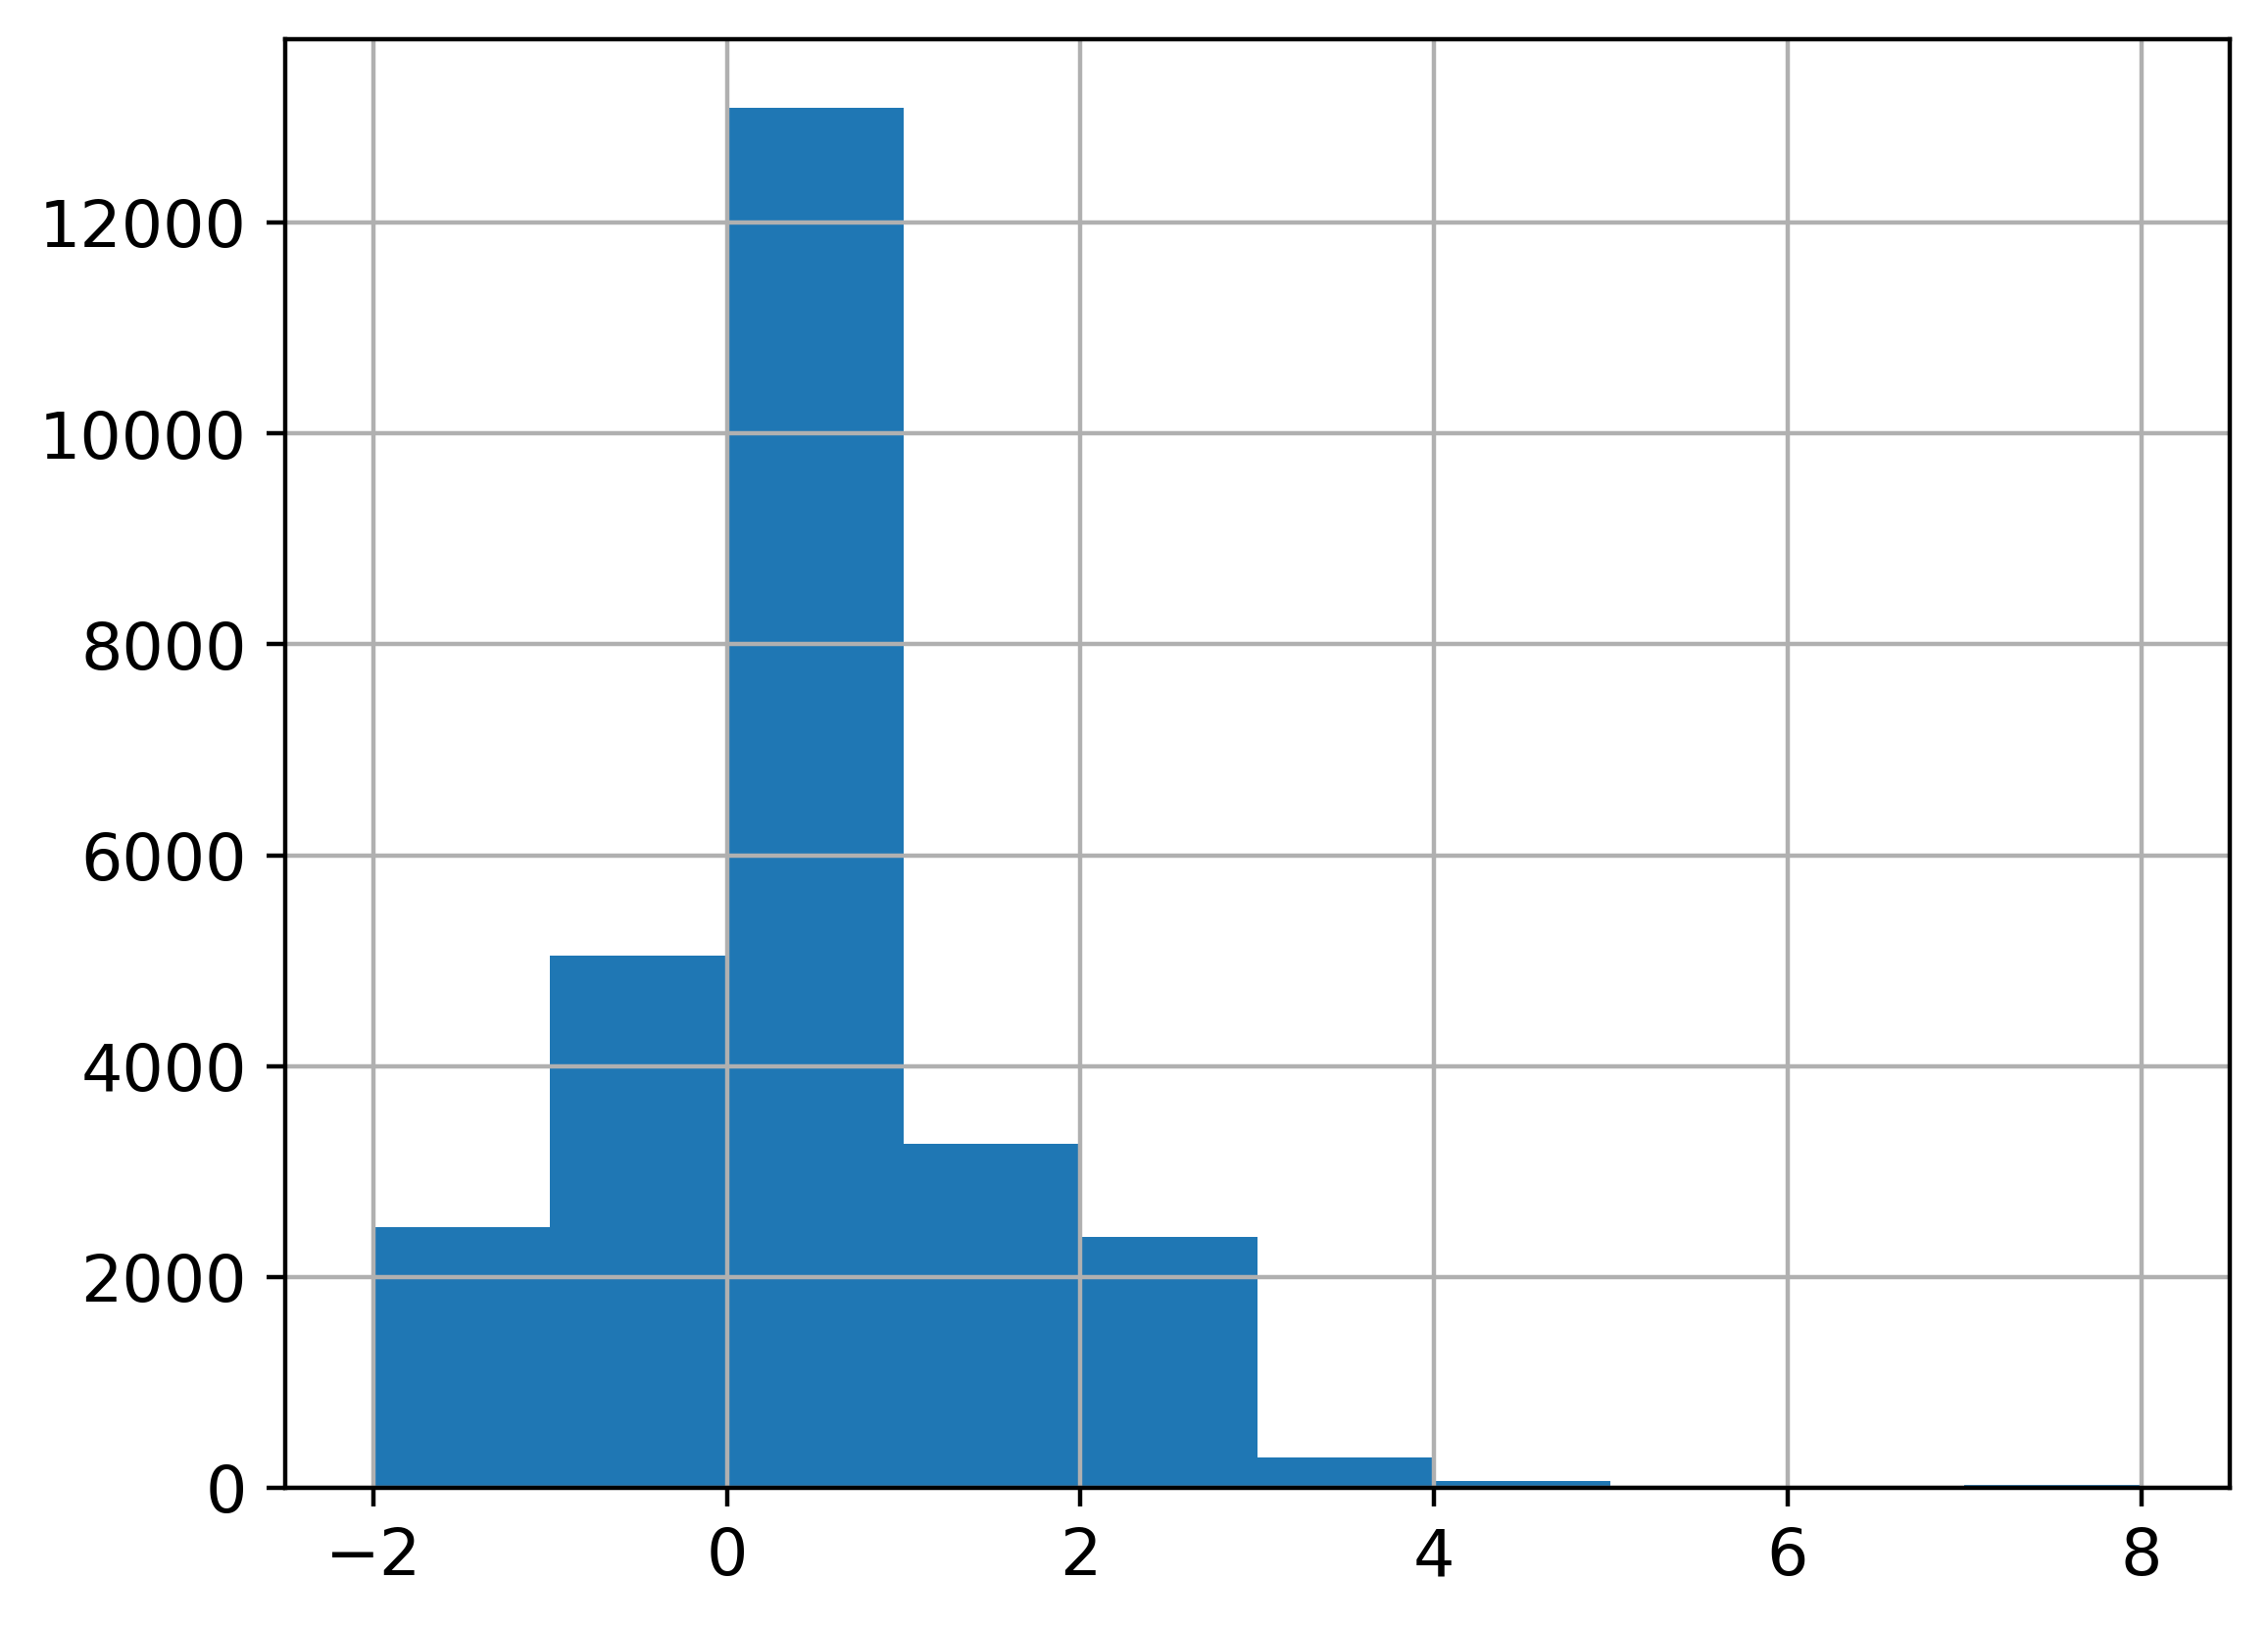

In [69]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 12

df['PAY_1'].hist()

In [70]:
pay_1_bins = np.array(range(-2, 10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of Accounts')

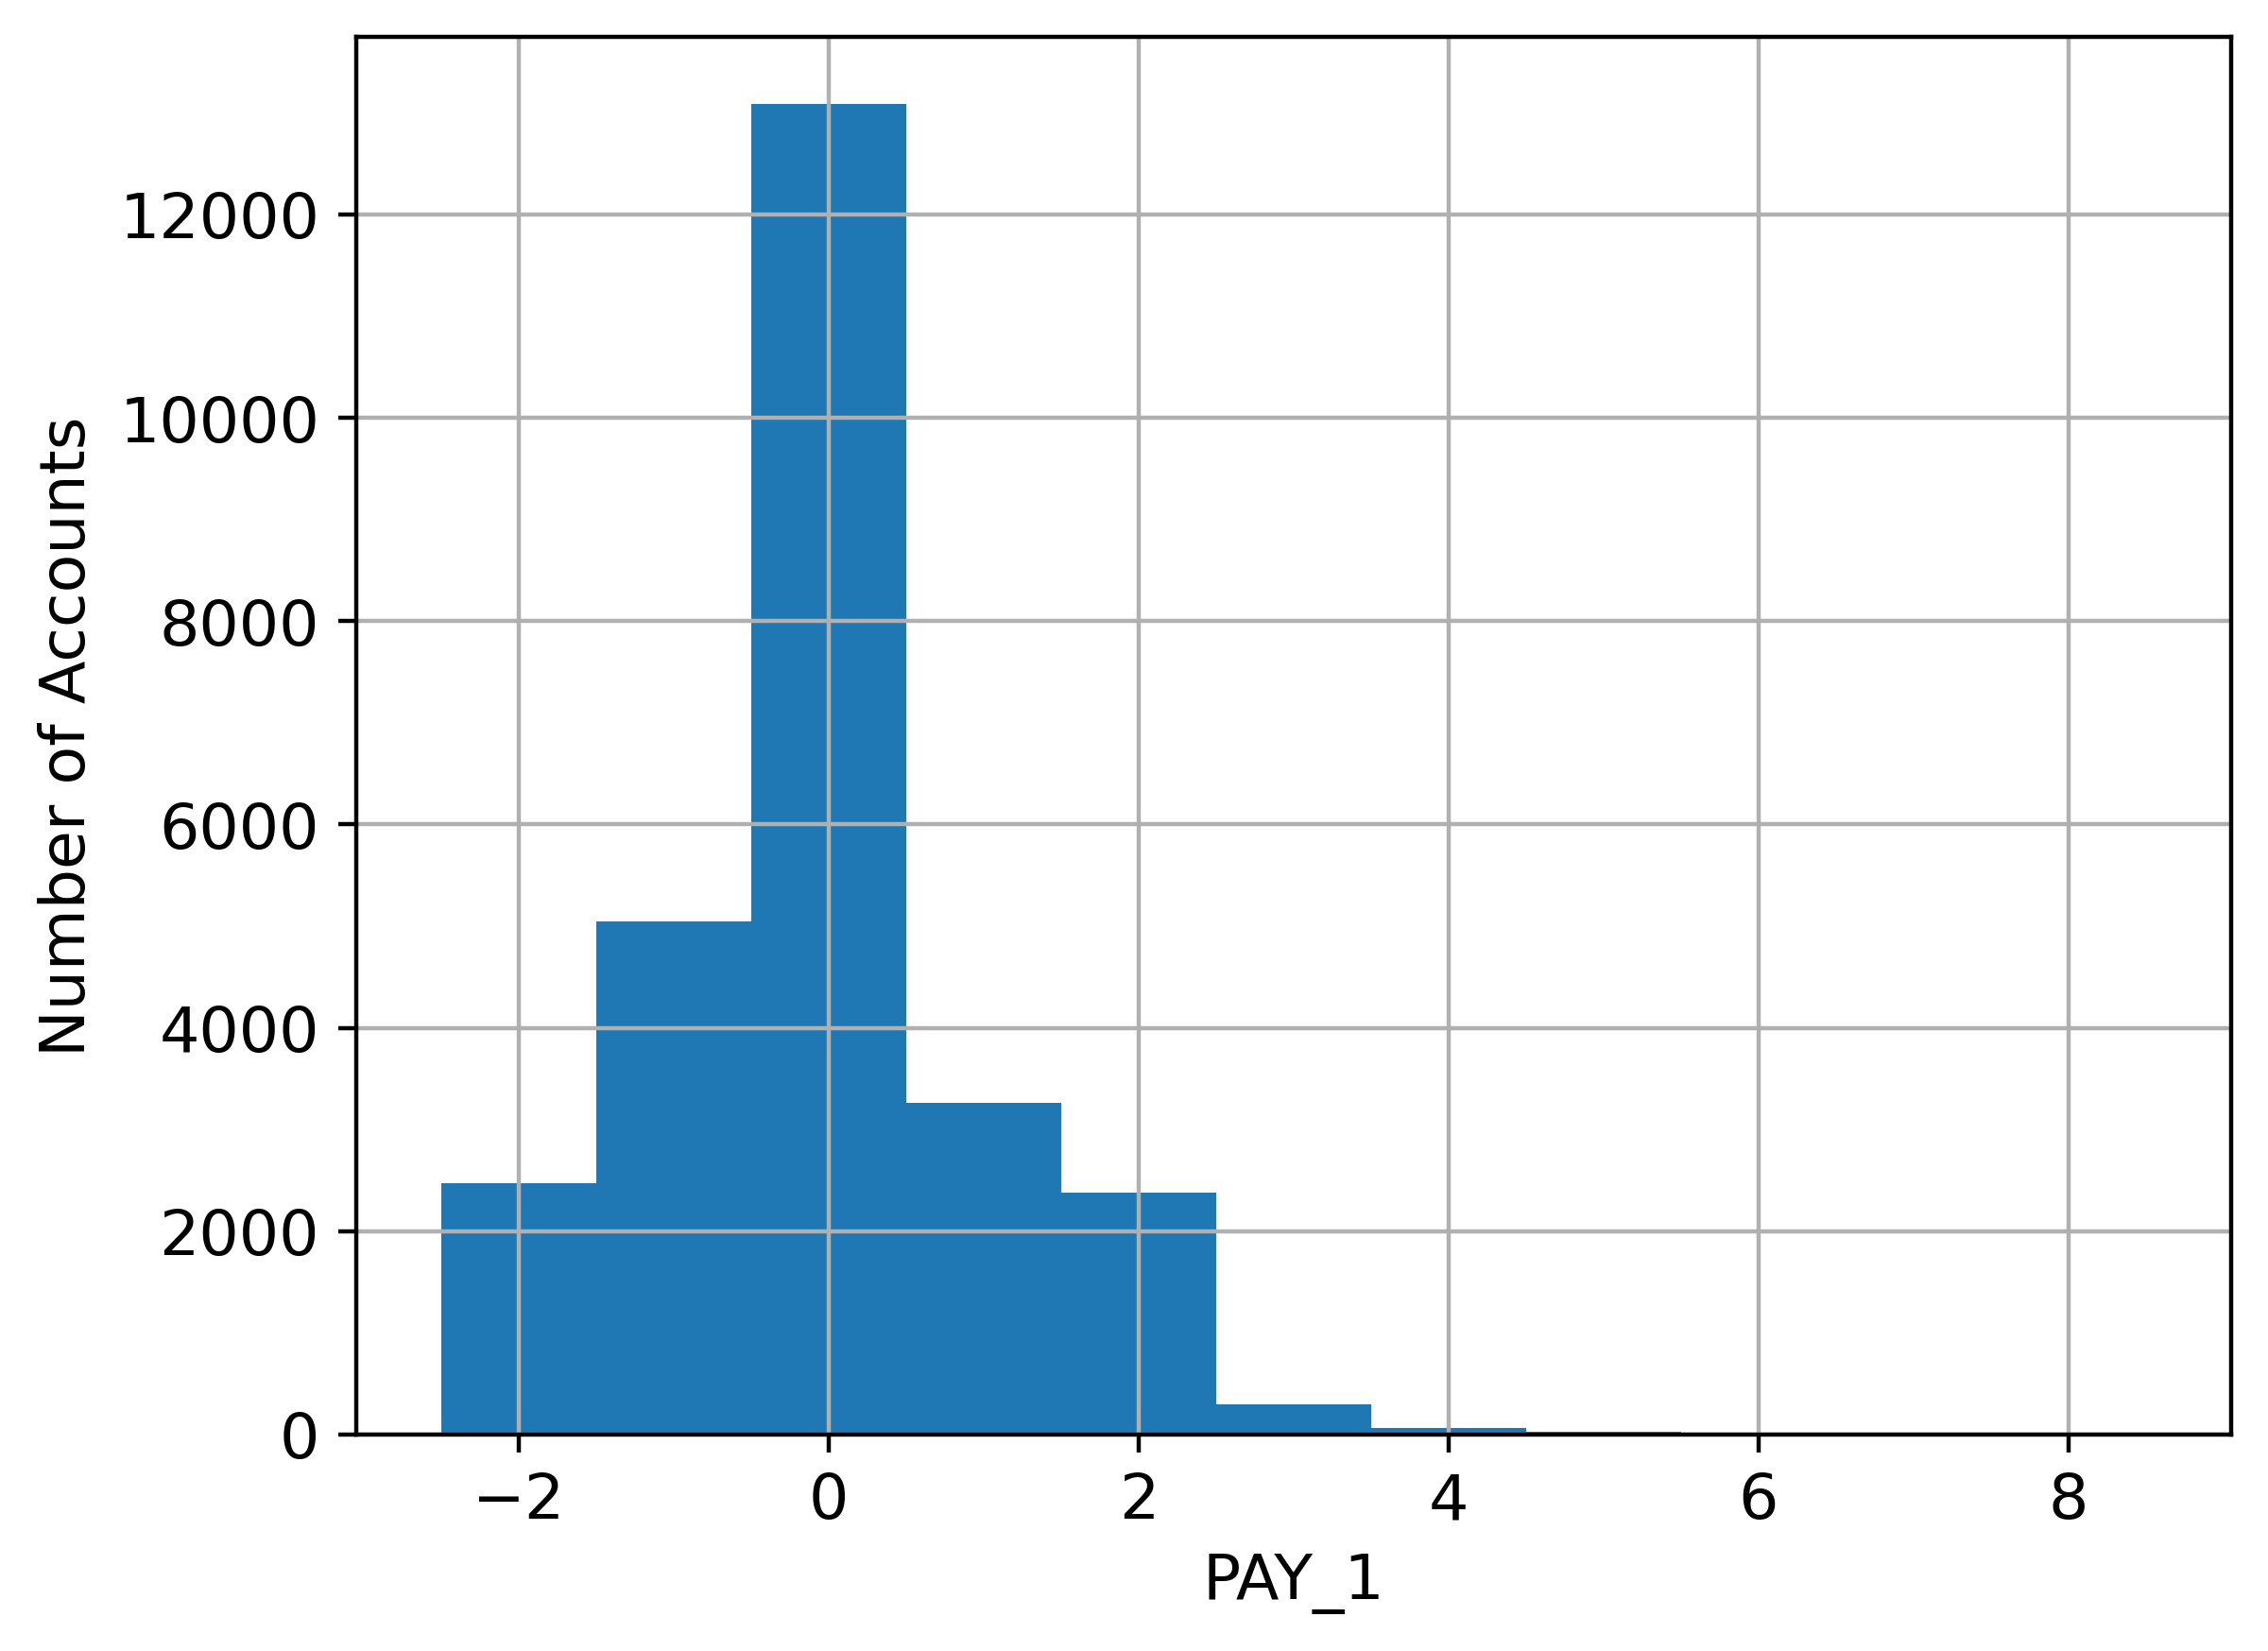

In [71]:
# New plotting in bins
df['PAY_1'].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of Accounts')

In [72]:
# Getting value_counts for remaining pay features (PAY_2, ... , PAY_6)
for feature in pay_features:
    print(df[feature].value_counts().sort_index())

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64
PAY_2
-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: count, dtype: int64
PAY_3
-2     3654
-1     5290
 0    13968
 1        3
 2     3400
 3      214
 4       69
 5       20
 6       19
 7       24
 8        3
Name: count, dtype: int64
PAY_4
-2     3893
-1     5070
 0    14596
 1        2
 2     2798
 3      161
 4       57
 5       30
 6        4
 7       51
 8        2
Name: count, dtype: int64
PAY_5
-2     4056
-1     4949
 0    15032
 2     2335
 3      151
 4       71
 5       14
 6        2
 7       53
 8        1
Name: count, dtype: int64
PAY_6
-2     4366
-1     5138
 0    14416
 2     2476
 3      156
 4       43
 5       10
 6       15
 7       42
 8        2
Name: count, dtype: int64


array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

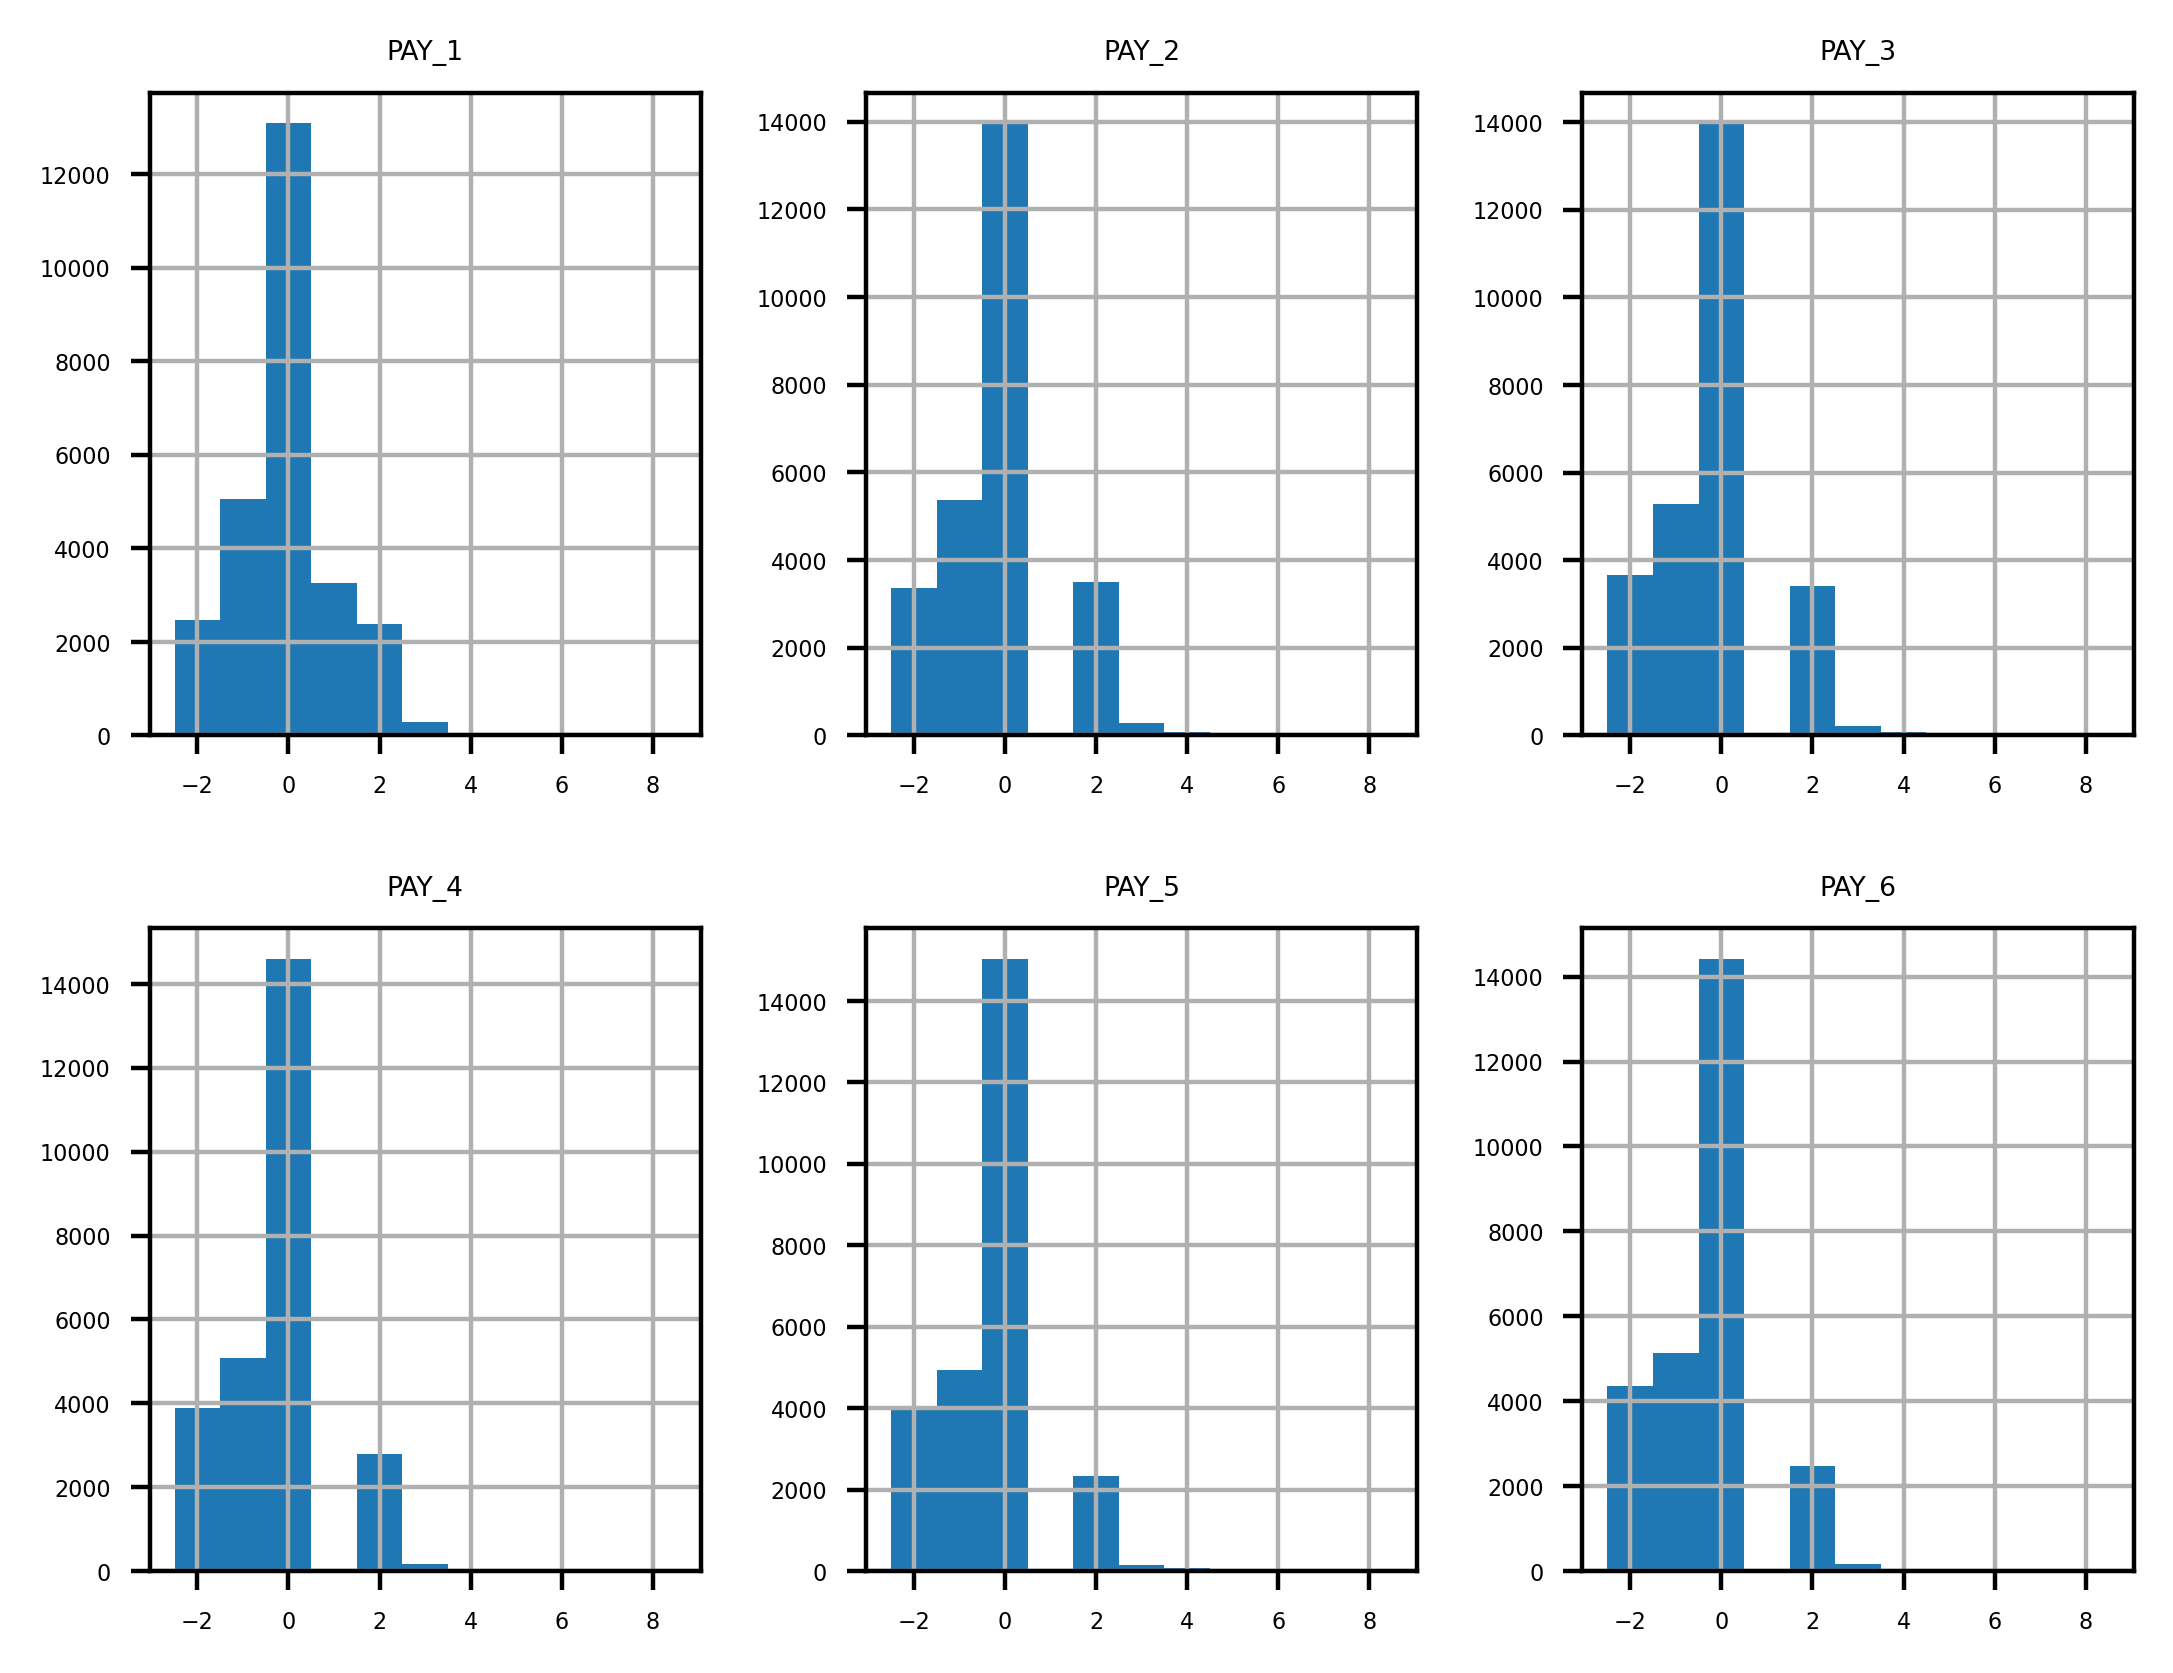

In [74]:
# Plotting number of accounts for each PAY feature (PAY_1, ... , PAY_6)
mpl.rcParams['font.size'] = 4
df[pay_features].hist(bins=pay_1_bins, layout=(2,3))